In [1]:
from DMRG.Ising import Hamilton_TL
from DMRG.spin import sigma
import analyse as al
delta = [0.2, 8]

In [2]:
def polarization(psi, L):
    l = np.empty([L, 3])
    for i in range(L):
        psi = psi.reshape((2**i, 2, 2**(L-i-1)))
        for k in range(3):
            rho = np.einsum("ijk, imk->jm", psi, psi.conj())
            l[i, k] = np.sum(rho.T*sigma[k+1]).real
    return l


def plot_polarization(L, markersize=4, H=None):
    if H is None:
        H = Hamilton_TL(L)['H']
    w, v = eigh(H)
    P = np.empty([2**L, L, 3])
    for i in range(2**L):
        P[i] = polarization(v[:, i], L)
    P2 = np.sum(P**2, axis=(1, 2))/L

    plot(w, P2, '.', markersize=markersize);
    grid();
    ylim(0, 1.05)
    xlabel(r'$E$')
    ylabel(r'$\sum|n^i|^2/L$')
    title(r'Average polarization of $L={}$ chain'.format(L))
    savefig('polar-L={}.pdf'.format(L))
    return w, P2

In [12]:
Hamilton_TL(4)['H'].dtype

dtype('float64')

In [3]:
def nsquare(L, delta):
    print('Doing n={},delta={}'.format(L, delta))
    H = Hamilton_TL(**al.generate_args({"n":L, "J": 1, "h":0.809, "g": (0.945, delta)}))['H']
    w, v = eigh(H)
    D = w.max() - w.min()
    K = 2**(L/2)
    print('bisect')
    start = bis.bisect_left(w, -D/K)
    end = bis.bisect_right(w, D/K)
    v = v[:, start:end]
    
    P = np.empty([end-start, L, 3])
    for i in range(end-start):
        P[i] = polarization(v[:, i], L)
    P2 = np.sum(P**2, axis=(1, 2))/L
    return np.median(P2)

def mnsquare(L, delta, m):
    return [nsquare(L, delta) for i in range(m)]

In [4]:
import bisect as bis

In [5]:
from scipy.interpolate import UnivariateSpline

In [26]:
ll = [-3,-2,-1,0,1,2,3]
start = bis.bisect_left(ll, -2)
end = bis.bisect_right(ll, 2)
ll[start:end]

[-2, -1, 0, 1, 2]

In [8]:
nsquare(12, 0.2)

Doing n=12,delta=0.2
bisect


0.011340015700601025

In [7]:
log(_)/log(2)

-5.444821686188792

In [13]:
L = [6,7,8,9,10,11,12]
N = [10,10,10,10,10,6,4]

In [14]:
nm0 = array([nsquare(i, 0) for i in L])

Doing n=6,delta=0
bisect
Doing n=7,delta=0
bisect
Doing n=8,delta=0
bisect
Doing n=9,delta=0
bisect
Doing n=10,delta=0
bisect
Doing n=11,delta=0
bisect
Doing n=12,delta=0
bisect


In [15]:
nm2 = [mnsquare(i, 0.2, n) for i,n in zip(L,N)]

Doing n=6,delta=0.2
bisect
Doing n=6,delta=0.2
bisect
Doing n=6,delta=0.2
bisect
Doing n=6,delta=0.2
bisect
Doing n=6,delta=0.2
bisect
Doing n=6,delta=0.2
bisect
Doing n=6,delta=0.2
bisect
Doing n=6,delta=0.2
bisect
Doing n=6,delta=0.2
bisect
Doing n=6,delta=0.2
bisect
Doing n=7,delta=0.2
bisect
Doing n=7,delta=0.2
bisect
Doing n=7,delta=0.2
bisect
Doing n=7,delta=0.2
bisect
Doing n=7,delta=0.2
bisect
Doing n=7,delta=0.2
bisect
Doing n=7,delta=0.2
bisect
Doing n=7,delta=0.2
bisect
Doing n=7,delta=0.2
bisect
Doing n=7,delta=0.2
bisect
Doing n=8,delta=0.2
bisect
Doing n=8,delta=0.2
bisect
Doing n=8,delta=0.2
bisect
Doing n=8,delta=0.2
bisect
Doing n=8,delta=0.2
bisect
Doing n=8,delta=0.2
bisect
Doing n=8,delta=0.2
bisect
Doing n=8,delta=0.2
bisect
Doing n=8,delta=0.2
bisect
Doing n=8,delta=0.2
bisect
Doing n=9,delta=0.2
bisect
Doing n=9,delta=0.2
bisect
Doing n=9,delta=0.2
bisect
Doing n=9,delta=0.2
bisect
Doing n=9,delta=0.2
bisect
Doing n=9,delta=0.2
bisect
Doing n=9,delta=0.2
bisect
D

In [16]:
nm16 = [mnsquare(i, 3, n) for i,n in zip(L,N)]

Doing n=6,delta=3
bisect
Doing n=6,delta=3
bisect
Doing n=6,delta=3
bisect
Doing n=6,delta=3
bisect
Doing n=6,delta=3
bisect
Doing n=6,delta=3
bisect
Doing n=6,delta=3
bisect
Doing n=6,delta=3
bisect
Doing n=6,delta=3
bisect
Doing n=6,delta=3
bisect
Doing n=7,delta=3
bisect
Doing n=7,delta=3
bisect
Doing n=7,delta=3
bisect
Doing n=7,delta=3
bisect
Doing n=7,delta=3
bisect
Doing n=7,delta=3
bisect
Doing n=7,delta=3
bisect
Doing n=7,delta=3
bisect
Doing n=7,delta=3
bisect
Doing n=7,delta=3
bisect
Doing n=8,delta=3
bisect
Doing n=8,delta=3
bisect
Doing n=8,delta=3
bisect
Doing n=8,delta=3
bisect
Doing n=8,delta=3
bisect
Doing n=8,delta=3
bisect
Doing n=8,delta=3
bisect
Doing n=8,delta=3
bisect
Doing n=8,delta=3
bisect
Doing n=8,delta=3
bisect
Doing n=9,delta=3
bisect
Doing n=9,delta=3
bisect
Doing n=9,delta=3
bisect
Doing n=9,delta=3
bisect
Doing n=9,delta=3
bisect
Doing n=9,delta=3
bisect
Doing n=9,delta=3
bisect
Doing n=9,delta=3
bisect
Doing n=9,delta=3
bisect
Doing n=9,delta=3
bisect


In [20]:
def logstat(M, base=2):
    m = np.array([mean(i) for i in M])
    v = np.array([std(i, ddof=1)/np.sqrt(len(i)) for i in M])
    return log(m)/log(base), v/m/log(base)

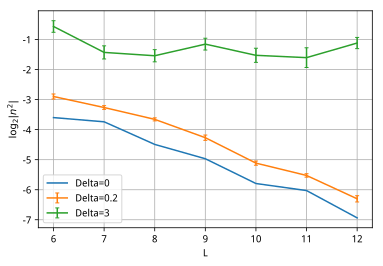

In [23]:
plot(L, log2(nm0), label='Delta=0')
errorbar(L, *logstat(nm2), label='Delta=0.2', capsize=2)
errorbar(L, *logstat(nm16), label='Delta=3', capsize=2)
grid();
legend();
xlabel('L');
ylabel('$\log_2 |n^2|$');

In [82]:
nm2

array([[0.13444485, 0.13547542, 0.13871927, 0.17350395, 0.14008979,
        0.14210013, 0.1676735 , 0.17328964, 0.1362056 , 0.16671609],
       [0.10361851, 0.10460623, 0.11045384, 0.10088661, 0.11508722,
        0.10575207, 0.09163345, 0.10578928, 0.1043867 , 0.10192014],
       [0.05607655, 0.08595296, 0.05987742, 0.09570417, 0.06933741,
        0.06042708, 0.07319401, 0.06880684, 0.08039386, 0.0550014 ],
       [0.05138483, 0.05413041, 0.07312622, 0.06102073, 0.04439377,
        0.06036356, 0.05392686, 0.05206696, 0.05473687, 0.06491783],
       [0.03017465, 0.03771686, 0.03056022, 0.02845087, 0.02978256,
        0.03116227, 0.03441549, 0.0331263 , 0.02499658, 0.03105741],
       [0.01966343, 0.02609258, 0.02333327, 0.02312436, 0.02188132,
        0.02027921, 0.02236673, 0.02064668, 0.01882485, 0.02214496]])

In [84]:
nm3

array([[0.60573661, 0.55798647, 0.50175515, 0.37701531, 0.55122888,
        0.82969427, 0.45669905, 0.340551  , 0.70889173, 0.2056573 ],
       [0.48280224, 0.79541978, 0.79759545, 0.67416871, 0.6501093 ,
        0.65660383, 0.37254962, 0.51221128, 0.2168647 , 0.68750322],
       [0.39632977, 0.41179576, 0.50191247, 0.42345077, 0.15533852,
        0.62382807, 0.44889166, 0.16153352, 0.64266635, 0.14769923],
       [0.63639262, 0.5969532 , 0.15933415, 0.50649071, 0.22998015,
        0.73554522, 0.19177502, 0.33213774, 0.50931256, 0.42107988],
       [0.60383755, 0.78341428, 0.49189922, 0.55395815, 0.35866992,
        0.58347011, 0.4614092 , 0.19674088, 0.25105337, 0.33836275],
       [0.71018698, 0.15477819, 0.33415122, 0.62329617, 0.06745367,
        0.55869849, 0.13935834, 0.57473562, 0.47679682, 0.23214837]])